## Classification 

Here I'm applying some common classification algorithms on the songs and glass datasets. The songs dataset captures details about a song year when it is released, title, artist name, loudness pitch, tempo, timbre values etc. All this independent values are used to predict if the song has made it to the top 10 list. I'll apply a logistic regression model to the songs dataset.

Reading the data from dataset

In [1]:
songs_data <- read.csv("../../datasets/songs/songs.csv", fileEncoding="latin1")
head(songs_data)

year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,⋯,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,⋯,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,⋯,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,⋯,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0


In [2]:
str(songs_data)
table(songs_data$year)

'data.frame':	7574 obs. of  39 variables:
 $ year                    : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ songtitle               : Factor w/ 7141 levels "_\u0084\u008d",..: 6203 5521 238 3113 45 605 252 4417 2884 6756 ...
 $ artistname              : Factor w/ 1032 levels "50 Cent","98 Degrees",..: 3 3 3 3 3 3 3 3 3 12 ...
 $ songID                  : Factor w/ 7549 levels "SOAACNI1315CD4AC42",..: 595 5439 5252 1716 3431 1020 1831 3964 6904 2473 ...
 $ artistID                : Factor w/ 1047 levels "AR00B1I1187FB433EB",..: 671 671 671 671 671 671 671 671 671 507 ...
 $ timesignature           : int  3 4 4 4 4 4 4 4 4 4 ...
 $ timesignature_confidence: num  0.853 1 1 1 0.788 1 0.968 0.861 0.622 0.938 ...
 $ loudness                : num  -4.26 -4.05 -3.57 -3.81 -4.71 ...
 $ tempo                   : num  91.5 140 160.5 97.5 140.1 ...
 $ tempo_confidence        : num  0.953 0.921 0.489 0.794 0.286 0.347 0.273 0.83 0.018 0.929 ...
 $ key                     : 


1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 
 328  196  186  324  198  258  178  329  380  357  363  282  518  434  479  392 
2006 2007 2008 2009 2010 
 479  622  415  483  373 

Let's start by splitting the songs_data dataframe into train and test sets.  We will put songs prior to the year 2009 in the train data and songs in 2010 in the test data. 

In [3]:
#split the data into train and test sets
songs_traindata <- subset(songs_data, year <=2009) 
songs_testdata <- subset(songs_data, year=2010)
head(songs_testdata,2)
head(songs_traindata,2)


year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0


,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
374,2009,The Awkward Goodbye,Athlete,SOUALGK12AB017FC37,ARDW3YJ1187FB4CCE5,3,0.732,-6.320,89.614,0.652,⋯,70.975,-71.776,58.432,-53.816,88.571,-89.816,38.026,-52.075,52.827,0
375,2009,Rubik's Cube,Athlete,SOGPIQC12AB0182B15,ARDW3YJ1187FB4CCE5,3,0.906,-9.541,117.742,0.542,⋯,112.879,-64.470,58.086,-76.937,74.441,-88.244,42.209,-66.812,40.749,0


Now we need to clean the data a bit. Let's remove the following independent variables ("year", "songtitle", "artistname", "songID", and "artistID") from songs_traindata and songs_testdata.

In [4]:
songs_traindata$year <- NULL 
songs_traindata$songtitle <- NULL 
songs_traindata$artistname <- NULL 
songs_traindata$songID <- NULL 
songs_traindata$artistID <- NULL 

songs_testdata$year <- NULL 
songs_testdata$songtitle <- NULL 
songs_testdata$artistname <- NULL 
songs_testdata$songID <- NULL 
songs_testdata$artistID <- NULL 

names(songs_testdata) #check to see if the variables were removed 
names(songs_traindata)
summary(songs_testdata) #now review the summary data with variables removed 

[1] "timesignature"            "timesignature_confidence"
 [3] "loudness"                 "tempo"                   
 [5] "tempo_confidence"         "key"                     
 [7] "key_confidence"           "energy"                  
 [9] "pitch"                    "timbre_0_min"            
[11] "timbre_0_max"             "timbre_1_min"            
[13] "timbre_1_max"             "timbre_2_min"            
[15] "timbre_2_max"             "timbre_3_min"            
[17] "timbre_3_max"             "timbre_4_min"            
[19] "timbre_4_max"             "timbre_5_min"            
[21] "timbre_5_max"             "timbre_6_min"            
[23] "timbre_6_max"             "timbre_7_min"            
[25] "timbre_7_max"             "timbre_8_min"            
[27] "timbre_8_max"             "timbre_9_min"            
[29] "timbre_9_max"             "timbre_10_min"           
[31] "timbre_10_max"            "timbre_11_min"           
[33] "timbre_11_max"            "Top10"

[1] "timesignature"            "timesignature_confidence"
 [3] "loudness"                 "tempo"                   
 [5] "tempo_confidence"         "key"                     
 [7] "key_confidence"           "energy"                  
 [9] "pitch"                    "timbre_0_min"            
[11] "timbre_0_max"             "timbre_1_min"            
[13] "timbre_1_max"             "timbre_2_min"            
[15] "timbre_2_max"             "timbre_3_min"            
[17] "timbre_3_max"             "timbre_4_min"            
[19] "timbre_4_max"             "timbre_5_min"            
[21] "timbre_5_max"             "timbre_6_min"            
[23] "timbre_6_max"             "timbre_7_min"            
[25] "timbre_7_max"             "timbre_8_min"            
[27] "timbre_8_max"             "timbre_9_min"            
[29] "timbre_9_max"             "timbre_10_min"           
[31] "timbre_10_max"            "timbre_11_min"           
[33] "timbre_11_max"            "Top10"

 timesignature   timesignature_confidence    loudness           tempo       
 Min.   :0.000   Min.   :0.0000           Min.   :-42.451   Min.   :  0.00  
 1st Qu.:4.000   1st Qu.:0.8193           1st Qu.:-10.847   1st Qu.: 88.86  
 Median :4.000   Median :0.9790           Median : -7.649   Median :103.27  
 Mean   :3.894   Mean   :0.8533           Mean   : -8.817   Mean   :107.35  
 3rd Qu.:4.000   3rd Qu.:1.0000           3rd Qu.: -5.640   3rd Qu.:124.80  
 Max.   :7.000   Max.   :1.0000           Max.   :  1.305   Max.   :244.31  
 tempo_confidence      key         key_confidence       energy       
 Min.   :0.0000   Min.   : 0.000   Min.   :0.0000   Min.   :0.00002  
 1st Qu.:0.3720   1st Qu.: 2.000   1st Qu.:0.2040   1st Qu.:0.50014  
 Median :0.7015   Median : 6.000   Median :0.4515   Median :0.71816  
 Mean   :0.6229   Mean   : 5.385   Mean   :0.4338   Mean   :0.67547  
 3rd Qu.:0.8920   3rd Qu.: 9.000   3rd Qu.:0.6460   3rd Qu.:0.88740  
 Max.   :1.0000   Max.   :11.000   Max.  

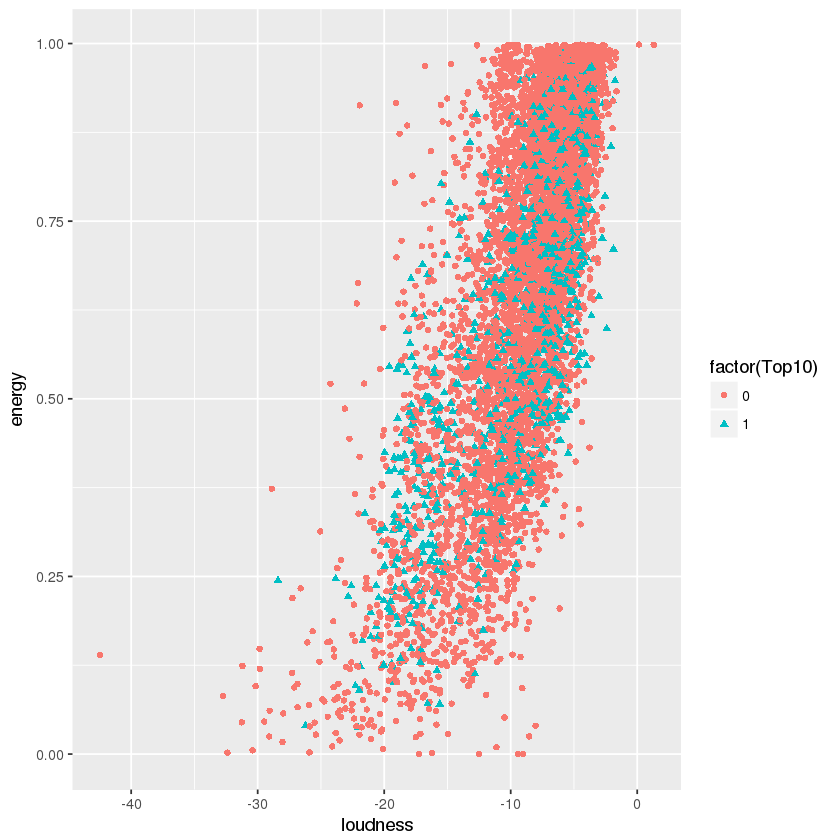

In [5]:
# Now I'll pLot the the variables loudness and energy of songs_traindata with 
# Top10 supplied to color and shape parameters.
library(ggplot2)
songs_plot <- ggplot(songs_traindata, aes(loudness, energy)) + geom_point(aes(colour=factor(Top10),shape=factor(Top10))) 
songs_plot

We can see in the above graph, there is not a clear linear boundary to separate the songs that made it to Top10 and those not.

Let's try to fit a logistic regression model to predict Top10 using all the independent variables. I'll name this model songsLog1.


Call:
glm(formula = Top10 ~ ., family = binomial, data = songs_traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9220  -0.5399  -0.3459  -0.1845   3.0770  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.470e+01  1.806e+00   8.138 4.03e-16 ***
timesignature             1.264e-01  8.674e-02   1.457 0.145050    
timesignature_confidence  7.450e-01  1.953e-01   3.815 0.000136 ***
loudness                  2.999e-01  2.917e-02  10.282  < 2e-16 ***
tempo                     3.634e-04  1.691e-03   0.215 0.829889    
tempo_confidence          4.732e-01  1.422e-01   3.329 0.000873 ***
key                       1.588e-02  1.039e-02   1.529 0.126349    
key_confidence            3.087e-01  1.412e-01   2.187 0.028760 *  
energy                   -1.502e+00  3.099e-01  -4.847 1.25e-06 ***
pitch                    -4.491e+01  6.835e+00  -6.570 5.02e-11 ***
timbre_0_min              2.316e-02  4.256e-03  

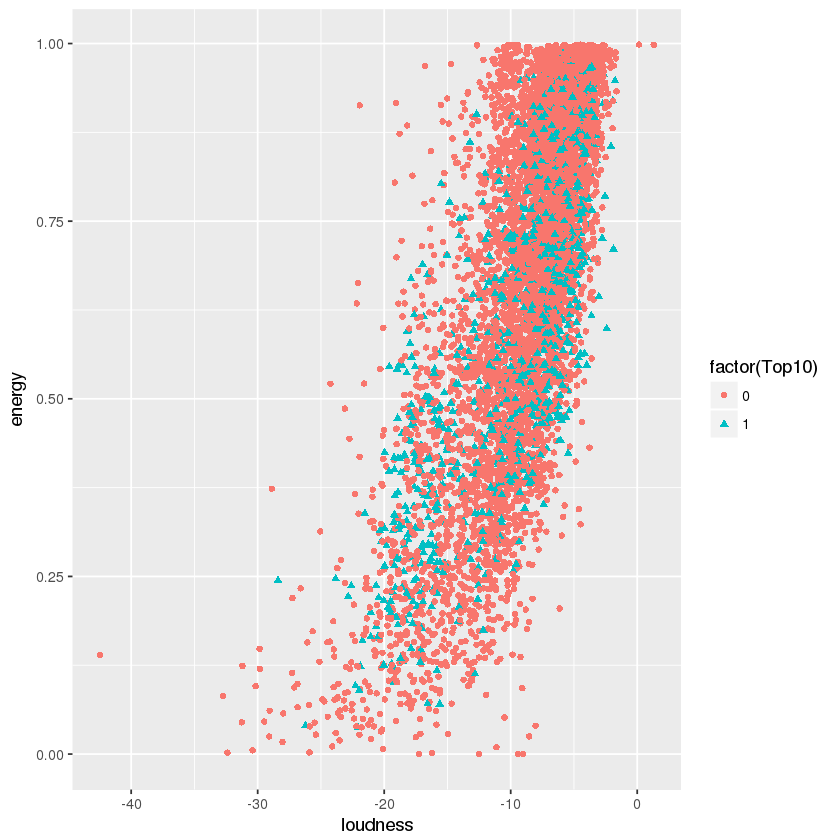

In [6]:
songsLog1 <- glm(Top10 ~., data=songs_traindata, family=binomial)
summary(songsLog1)


songsLog1_slope3 <- coef(songsLog1)[2]/(-coef(songsLog1)[3])
songsLog1_intercept3 <- coef(songsLog1)[1]/(-coef(songsLog1)[3]) 
songs_plot + geom_abline(slope=songsLog1_slope3, intercept=songsLog1_intercept3) # An attempt at some of the other codes shown in the lab

In [7]:
summary(songsLog1)


Call:
glm(formula = Top10 ~ ., family = binomial, data = songs_traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9220  -0.5399  -0.3459  -0.1845   3.0770  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.470e+01  1.806e+00   8.138 4.03e-16 ***
timesignature             1.264e-01  8.674e-02   1.457 0.145050    
timesignature_confidence  7.450e-01  1.953e-01   3.815 0.000136 ***
loudness                  2.999e-01  2.917e-02  10.282  < 2e-16 ***
tempo                     3.634e-04  1.691e-03   0.215 0.829889    
tempo_confidence          4.732e-01  1.422e-01   3.329 0.000873 ***
key                       1.588e-02  1.039e-02   1.529 0.126349    
key_confidence            3.087e-01  1.412e-01   2.187 0.028760 *  
energy                   -1.502e+00  3.099e-01  -4.847 1.25e-06 ***
pitch                    -4.491e+01  6.835e+00  -6.570 5.02e-11 ***
timbre_0_min              2.316e-02  4.256e-03  

Now let's try making predictions on the test set using songsLog1 model.

In [8]:
# Run the model on the same data that it was trained with and get the probabilities for each sample. 
glm.probs <- predict(songsLog1, type="response")
# create an array to hold predictions and assign all zeros initially.
glm.pred = rep(0,length(glm.probs))

We'll calculate the accuracy of the model 'songsLog1' on the test set, using a threshold of 0.5 

In [9]:
# based on model's probablities for each sample, assign the class label.
glm.pred[glm.probs>0.5] <- 1
# now we should create a confusion table to see our true positive and false positive
conftable <- table(glm.pred, songs_traindata$Top10)
conftable

# you can always check the math more manually like so...
(6007)/(6007+858) 

        
glm.pred    0    1
       0 6007  858
       1  134  202

[1] 0.8750182

Calculate baseline model accuracy.

In [10]:
# note this should look close to our manual calculations above 
# Compute accuracy
print (paste("accuracy = ",sum(diag(conftable))/length(glm.pred)))


[1] "accuracy =  0.86224135536731"


### Using LDA and SVM

Now we'll apply LDA and SVM algorithms on the glass dataset. 
The dependent variable in the dataset Type has 6 different classes. 
Here we can apply LDA on the dataset to determine the type of glass.

In [11]:
glass_data = read.csv("../../datasets/glass/glass.txt",header=FALSE,sep=',')
head(glass_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [12]:
# The data file doesn't have headers. So read the column names into a vector and add column names to the glass dataset.
header = c("Id", "Refractive_Index","Sodium","Magnesium","Aluminium","Silicon","Potassium","Calcium","Barium","Iron","Type")
names(glass_data)=header

In [13]:
head(glass_data)

Id,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [14]:
# Convert Type variable to factor type. 
glass_data$Type=as.factor(glass_data$Type)
str(glass_data)

'data.frame':	214 obs. of  11 variables:
 $ Id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Refractive_Index: num  1.52 1.52 1.52 1.52 1.52 ...
 $ Sodium          : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Magnesium       : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Aluminium       : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Silicon         : num  71.8 72.7 73 72.6 73.1 ...
 $ Potassium       : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Calcium         : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Barium          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Iron            : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type            : Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


We should plot the variables Refrective_Index and Sodium of glass_data with Type variable supplied to color and shape parameters.

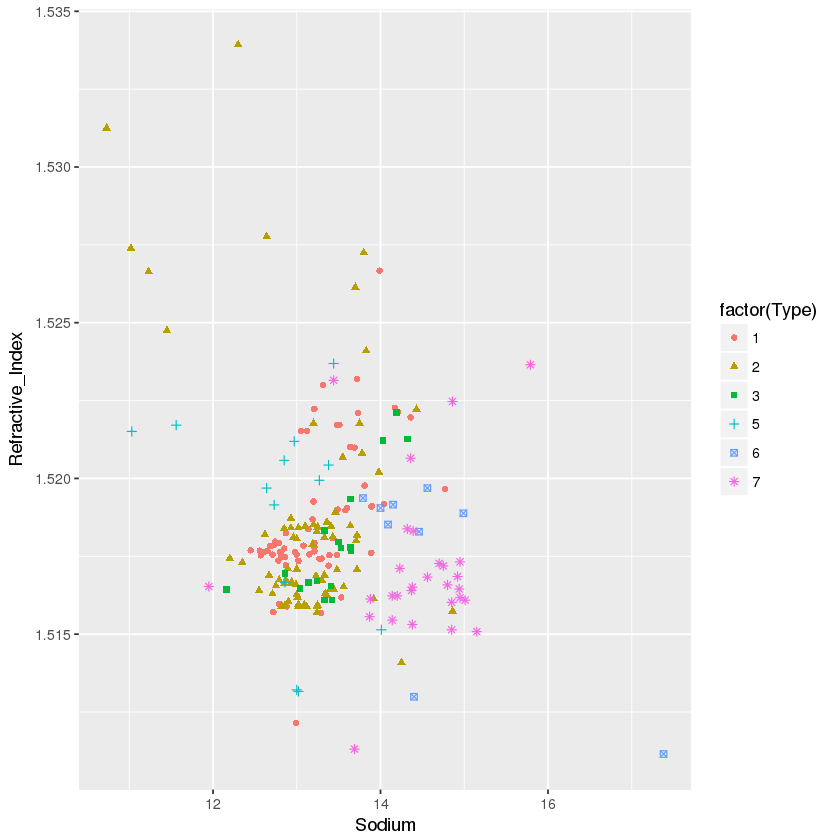

In [15]:
library(ggplot2)
ggplot(glass_data, aes(Sodium, Refractive_Index)) + geom_point(aes(colour=factor(Type),shape=factor(Type)))

Now it's time to split the glass_data into train and test subsets. glass_train_data will have 70% data and glass_test_data will have rest 30% of data. 

In [16]:
library(e1071)
library(caret)
library(caTools)
set.seed(123) 
split=0.70
trainIndex <- createDataPartition(glass_data$Type, p=split, list=FALSE)

# Train data will have the rest 70% of data
glass_train_data <- glass_data[trainIndex,] 

# Test data will have the rest 30% of data
glass_test_data <- glass_data[-trainIndex,] 

names(glass_data) #view the headings 

Loading required package: lattice


[1] "Id"               "Refractive_Index" "Sodium"           "Magnesium"       
 [5] "Aluminium"        "Silicon"          "Potassium"        "Calcium"         
 [9] "Barium"           "Iron"             "Type"

Fit a Linear Discriminant Analysis model on glass_train_data using all independent variables except Id to predict Type variable. Name this model glass_lda_fit.

        Length Class  Mode     
prior    6     -none- numeric  
counts   6     -none- numeric  
means   54     -none- numeric  
scaling 45     -none- numeric  
lev      6     -none- character
svd      5     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

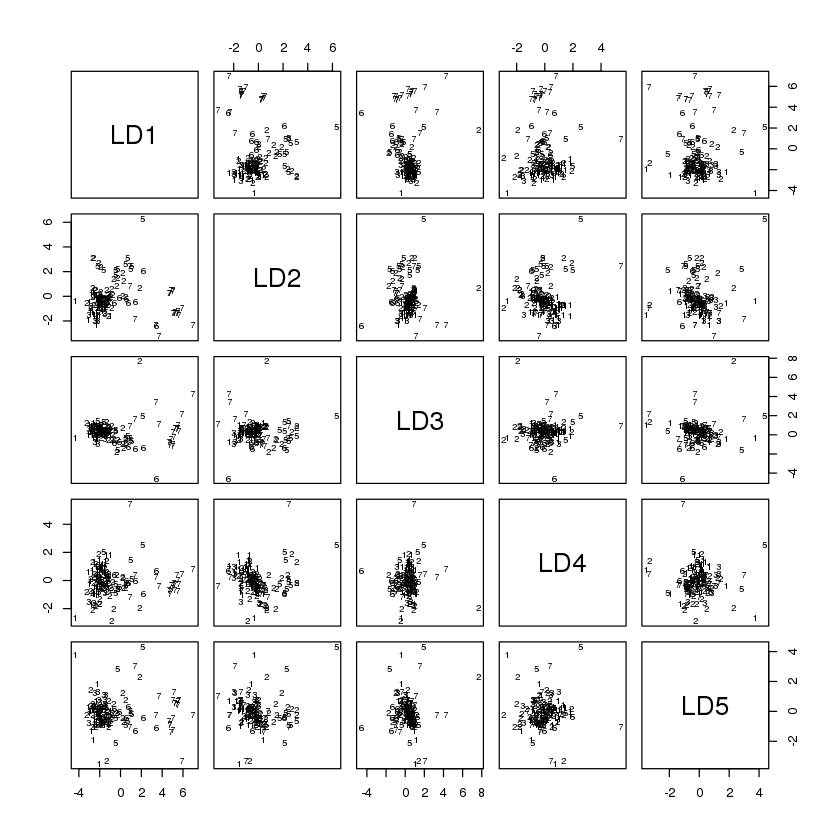

In [17]:
library(MASS)
glass_lda_fit <- lda(Type ~ Refractive_Index + Sodium + Magnesium + Aluminium + Silicon + Potassium + Calcium + Barium + Iron, data=glass_train_data)
plot(glass_lda_fit) # get a quick visual, the visuals help. 
summary(glass_lda_fit) #look at the summary 

In [18]:
# <lda_model>$count will give the counts for each class in the data
glass_lda_fit$count

1  2  3  5  6  7 
49 54 12 10  7 21

In [19]:
# the singular values (svd) gives the ratio of the between and within-group standard deviations of the linear 
# discriminant variables.
glass_lda_fit$svd

[1] 12.408870  4.919218  2.471763  1.555079  1.307355

In [20]:
# normalized proportions.
prop = glass_lda_fit$svd^2/sum(glass_lda_fit$svd^2)
prop

# Based on values displayed below, 1st LDA can explain more than 79% percent of between-group variance in this dataset.

[1] 0.817235245 0.128432466 0.032426222 0.012834757 0.009071309

Now let's predict the glass type in glass_test_data using the model glass_lda_fit built above.

In [21]:
predts=predict(glass_lda_fit, glass_test_data)
# we'll print the classes of glass - these are represented in numbers
predts$class

[1] 1 1 1 1 1 1 3 2 1 2 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 2 1 2 2 2 2 5 1 2 2 2 1
[39] 1 2 2 2 1 2 1 2 1 2 7 5 2 6 6 2 7 7 7 7 7 7 7
Levels: 1 2 3 5 6 7

Let's calculate the accuracy of the model using the confusion matrix. 

In [22]:
# Building a confusion matrix using 2-way table.
conftable <- table(data=predts$class, glass_test_data$Type)
conftable
(16)/(16+6+2) # some simple math for accuracy checks 

# Accuracy of the model. 
print (paste("accuracy = ",sum(diag(conftable))/length(predts$class)))

    
data  1  2  3  5  6  7
   1 16  6  2  0  0  0
   2  4 15  3  1  0  1
   3  1  0  0  0  0  0
   5  0  1  0  1  0  0
   6  0  0  0  0  2  0
   7  0  0  0  1  0  7

[1] 0.6666667

[1] "accuracy =  0.672131147540984"


#### Try an SVM moel 

LDA did not do a great job in classifying the different glass types in our data. 

Let's try to apply SVM on the same data to see if there would be any improvement in the classification accuracy.

We'll fit a SVM model on glass_train_data using all independent variables except Id to predict Type variable. 

In [35]:
# Let's look at a radial model first.  
library("e1071")
svm_model = svm(Type ~ ., data=glass_train_data, kernel="radial", cost=10, scale=FALSE)
summary(svm_model)

# setting up the code to solve for the problem using the best model
pred <- predict(svm_model, glass_test_data[,-11])

# below I'm using the confustionmatrix function of the caret package to visualize the accuracy of the model. 
confusionMatrix(data=pred, glass_test_data$Type)



Call:
svm(formula = Type ~ ., data = glass_train_data, kernel = "radial", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.1 

Number of Support Vectors:  123

 ( 39 44 10 7 6 17 )


Number of Classes:  6 

Levels: 
 1 2 3 5 6 7




Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  5  6  7
         1 21  0  0  0  0  0
         2  0 22  0  1  0  0
         3  0  0  5  0  0  0
         5  0  0  0  2  0  0
         6  0  0  0  0  2  0
         7  0  0  0  0  0  8

Overall Statistics
                                         
               Accuracy : 0.9836         
                 95% CI : (0.912, 0.9996)
    No Information Rate : 0.3607         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9772         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            1.0000   1.0000  1.00000  0.66667  1.00000   1.0000
Specificity            1.0000   0.9744  1.00000  1.00000  1.00000   1.0000
Pos Pred Value         1.0000   0.9565  1.00000  1.00000  1.00000   1.0000
Neg Pred Value         1.0000   1.0000  1.00000  0.98305  1.00000

In [24]:
library(e1071) # Here we are just exploring the best model parameters on a linear kernel.  
# I tried a radial kernal first and the best model gave me a cost of 100 with 123 support vectors.  
# using this method we can find parameters to best tune our model.  
# below I built a new model called svm.model2 using these parameters. 
set.seed (1)
tune.out=tune(svm,Type~.,data=glass_train_data, kernel ="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.065 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.6462500 0.09715176
2 1e-02 0.3458333 0.14219672
3 1e-01 0.1770833 0.11737960
4 1e+00 0.0650000 0.06193261
5 5e+00 0.0650000 0.06945000
6 1e+01 0.0650000 0.06945000
7 1e+02 0.0650000 0.06945000


Now we'll try a different model - a linear model.  

Linear kernels are best to apply on linearly separable data. Imagine your dataset has only 2 features, and 2 classes. If you plot your dataset samples in a chart using the 2 features as X and Y, you'll be able to see how samples from different classes position in relation to each other.

If it's easy to draw a line that separates the two classes, then a linear kernel is great for the job:

Note a linear SVM is less prone to overfitting than non-linear. And you need to decide which kernel to choose based on your situation: if your number of features is really large compared to the training sample, just use linear kernel; if your number of features is small, but the training sample is large, you may also need linear kernel but try to add more features; if your feature number is small (10^0 - 10^3), and the sample number is intermediate (10^1 - 10^4), use Gaussian kernel will be better.

In [36]:
library("e1071") # creating a second model using a low cost parameter and linear kernel 
svm_model2 = svm(Type ~ ., data=glass_train_data, kernel="linear", cost=1, scale=FALSE)
summary(svm_model2)

# setting up the code to solve for the problem using the best model
pred <- predict(svm_model2, glass_test_data[,-11])

# below I'm using the confustionmatrix function of the caret package to find the accuracy of the model. 
confusionMatrix(data=pred, glass_test_data$Type)



Call:
svm(formula = Type ~ ., data = glass_train_data, kernel = "linear", 
    cost = 1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  16

 ( 1 3 3 3 3 3 )


Number of Classes:  6 

Levels: 
 1 2 3 5 6 7




Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  5  6  7
         1 21  0  0  0  0  0
         2  0 22  0  0  0  0
         3  0  0  5  1  0  0
         5  0  0  0  2  0  0
         6  0  0  0  0  2  0
         7  0  0  0  0  0  8

Overall Statistics
                                         
               Accuracy : 0.9836         
                 95% CI : (0.912, 0.9996)
    No Information Rate : 0.3607         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9773         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            1.0000   1.0000  1.00000  0.66667  1.00000   1.0000
Specificity            1.0000   1.0000  0.98214  1.00000  1.00000   1.0000
Pos Pred Value         1.0000   1.0000  0.83333  1.00000  1.00000   1.0000
Neg Pred Value         1.0000   1.0000  1.00000  0.98305  1.00000

       class
predict  1  2  3  5  6  7
      1 21  0  0  0  0  0
      2  0 22  0  0  0  0
      3  0  0  5  1  0  0
      5  0  0  0  2  0  0
      6  0  0  0  0  2  0
      7  0  0  0  0  0  8

#### Now let's try a polynomial kernel 

In [37]:
svm_model3 = svm(Type ~ ., data=glass_train_data, kernel="polynomial", cost=2, scale=FALSE)
summary(svm_model3)

# setting up the code to solve for the problem using the best model
pred <- predict(svm_model3, glass_test_data[,-11])

# below I'm using the confustionmatrix function of the caret package to find the accuracy of the model. 
confusionMatrix(data=pred, glass_test_data$Type)



Call:
svm(formula = Type ~ ., data = glass_train_data, kernel = "polynomial", 
    cost = 2, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  2 
     degree:  3 
      gamma:  0.1 
     coef.0:  0 

Number of Support Vectors:  13

 ( 1 2 2 3 3 2 )


Number of Classes:  6 

Levels: 
 1 2 3 5 6 7




Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  5  6  7
         1 21  0  0  0  0  0
         2  0 22  0  0  0  0
         3  0  0  5  1  0  0
         5  0  0  0  2  0  0
         6  0  0  0  0  2  0
         7  0  0  0  0  0  8

Overall Statistics
                                         
               Accuracy : 0.9836         
                 95% CI : (0.912, 0.9996)
    No Information Rate : 0.3607         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9773         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            1.0000   1.0000  1.00000  0.66667  1.00000   1.0000
Specificity            1.0000   1.0000  0.98214  1.00000  1.00000   1.0000
Pos Pred Value         1.0000   1.0000  0.83333  1.00000  1.00000   1.0000
Neg Pred Value         1.0000   1.0000  1.00000  0.98305  1.00000

       class
predict  1  2  3  5  6  7
      1 21  0  0  0  0  0
      2  0 22  0  0  0  0
      3  0  0  5  1  0  0
      5  0  0  0  2  0  0
      6  0  0  0  0  2  0
      7  0  0  0  0  0  8

#### Final thoughts 

SVM performs much better than LDA when predicting glass types.  We tried several different parameters using the SVM model and they all seem pretty good.  Going forward we'd want to continue to test the model to see how it performs to new and unseen data....we're going to want to avoid overfitting.  